## Data loading and handling

In [1]:
# This is a dictionary containing dataframes with the GREAT regions of 
# each species
greg = gr_great
#how many genes in each species:
print( [(k,len(v)) for k,v in greg.items()])

[('Dre', 20053), ('Bla', 20569), ('Ola', 15978), ('Mmu', 18842)]


for each species we have a dataframe  
in there, each gene is assigned a genomic region   
for GREAT regions those might overlap  
Using this in the later steps we will count the number of ATACseq peaks in the region of each gene 

In [2]:
# busywork
stages = {}
stages['Bla'] = ['8','15','36','60']
stages['Dre'] = ["dome","shield","80epi","8som","24h","48h"]
stages['Ola'] = ["dome","shield","8som","24h","48h"]
stages['Mmu'] = ['DE','ESC']

In [3]:
#load the ATACseq peaks
peak_beds = {}
peak_beds['Dre'] = [ (BT(zebra_idr(x))
                    .sort()
                    )for x in stages['Dre']]
peak_beds['Bla'] = [(BT(amphi_idr(x))
                     .sort()
                     ) for x in stages['Bla']]

In [4]:
stagespecorder = ['bla_8','bla_15','bla_36','bla_60',' ',
             'dre_dome','dre_shield','dre_80epi','dre_8som',
                  'dre_24h','dre_48h'
            ]

In [5]:
bedfields = ['chrom','start','end','name','score','strand']
big = {}
big['Dre'] = BT().from_dataframe(greg['Dre']).sort()
for bee in peak_beds['Dre']:
    big['Dre'] = big['Dre'].intersect(b = bee, 
              c=True, sorted=True, nonamecheck=True)
big['Dre'] = big['Dre'].to_dataframe()
big['Dre'].columns = bedfields + stages['Dre']
# the other species:
big['Bla'] = BT().from_dataframe(greg['Bla']).sort()
for bee in peak_beds['Bla']:
    big['Bla'] = big['Bla'].intersect(b = bee, 
              c=True, sorted=True, nonamecheck=True)
big['Bla'] = big['Bla'].to_dataframe()
big['Bla'].columns = bedfields + stages['Bla']

In [6]:
# These dataframe now have 
big['Dre'].sample(3)

chrom     start       end                name   score strand  dome  \
8180    chr2    224152    279922  ENSDARG00000078694   55770      +     3   
17494   chr7  21664399  22022625  ENSDARG00000077329  358226      -    38   
9728   chr20  40595103  40831250  ENSDARG00000041799  236147      -    13   

       shield  80epi  8som  24h  48h  
8180        4      8     7    3    4  
17494      35     44    53   46   58  
9728       19     27    33   26   27

In [7]:
buz = pd.melt( big['Dre'][['score'] + stages['Dre']],
              id_vars=['score'] )
buz['species'] = 'dre'

biz = pd.melt( big['Bla'][['score'] + stages['Bla']],
              id_vars=['score'] )
biz['species'] = 'bla'

buz['score'] = buz['score'].apply(lambda x: int(x/10000) )
biz['score'] = biz['score'].apply(lambda x: int(x/10000) )

comb = pd.concat([biz,buz])
comb.head()

score variable  value species
0     16        8      6     bla
1     34        8     11     bla
2     21        8      6     bla
3      8        8      4     bla
4     11        8      8     bla

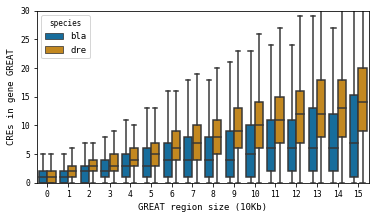

In [8]:
Fwidth = THESIS_PAGEWIDTH
Fheight = Fwidth*(9/16.)
fig, ax = plt.subplots()
fig.subplots_adjust(left=.09, bottom=.15, right=.99, top=.98)

sns.boxplot(data=comb[comb['score']<=15],
            x='score',hue='species',y='value',
            fliersize=0,
            palette=sns.color_palette("colorblind", 8))

plt.ylim((0,30))
ax.set_ylabel('CREs in gene GREAT')
ax.set_xlabel('GREAT region size (10Kb)')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/tfigure_stratified1.pdf')

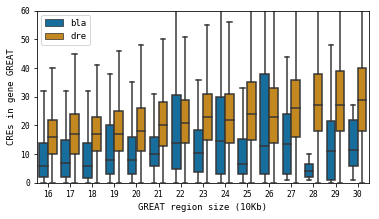

In [9]:
Fwidth = THESIS_PAGEWIDTH
Fheight = Fwidth*(9/16.)
fig, ax = plt.subplots()
fig.subplots_adjust(left=.09, bottom=.15, right=.99, top=.98)

sns.boxplot(data=comb[(comb['score']>15) & (comb['score']<=30)],
            x='score',hue='species',y='value',
            fliersize=0,
            palette=sns.color_palette("colorblind", 8))

plt.ylim((0,60))
ax.set_ylabel('CREs in gene GREAT')
ax.set_xlabel('GREAT region size (10Kb)')
plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/tfigure_stratified2.pdf')

In [10]:
gr_interg = {}
gr_interg['Dre'] = pd.read_csv("/home/ska/panos/myphdthesis/data/genomic_regions/intergenics_Dre.tsv.gz",
                       sep='\t', header=None)
gr_interg['Dre'].columns = ['chrom','start','end',
                            'geneID1','geneID2']
gr_interg['Dre']['score'] = (gr_interg['Dre']['end'] 
                             - gr_interg['Dre']['start'])
gr_interg['Bla'] = pd.read_csv("/home/ska/panos/myphdthesis/data/genomic_regions/intergenics_Bla.tsv.gz",
                       sep='\t', header=None)
gr_interg['Bla'].columns = ['chrom','start','end',
                            'geneID1','geneID2']
gr_interg['Bla']['score'] = (gr_interg['Bla']['end'] 
                             - gr_interg['Bla']['start'])

In [11]:
greg = gr_interg.copy()
bedfields = ['chrom','start','end','name','score','strand']
big = {}
big['Dre'] = BT().from_dataframe(greg['Dre']).sort()
for bee in peak_beds['Dre']:
    big['Dre'] = big['Dre'].intersect(b = bee, 
                          c=True, sorted=True, nonamecheck=True)
big['Dre'] = big['Dre'].to_dataframe()
big['Dre'].columns = ['c','st','e','id1','id2','score'] + stages['Dre']
# the other species:
big['Bla'] = BT().from_dataframe(greg['Bla']).sort()
for bee in peak_beds['Bla']:
    big['Bla'] = big['Bla'].intersect(b = bee, 
                          c=True, sorted=True, nonamecheck=True)
big['Bla'] = big['Bla'].to_dataframe()
big['Bla'].columns = ['c','st','e','id1','id2','score'] + stages['Bla']

In [12]:
buz = pd.melt( big['Dre'][['score'] + stages['Dre']], id_vars=['score'] )
buz['species'] = 'dre'

biz = pd.melt( big['Bla'][['score'] + stages['Bla']], id_vars=['score'] )
biz['species'] = 'bla'

buz['score'] = buz['score'].apply(lambda x: int(x/10000) )
biz['score'] = biz['score'].apply(lambda x: int(x/10000) )

comb = pd.concat([biz,buz])
# comb['score'] = comb['score'].clip(upper=19)
comb.head()

score variable  value species
0     28        8      5     bla
1      5        8      4     bla
2      1        8      1     bla
3     10        8      5     bla
4      2        8      3     bla

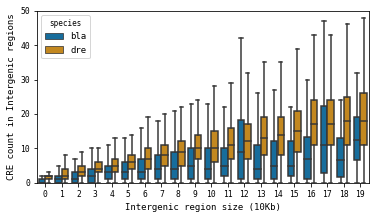

In [13]:
Fwidth = THESIS_PAGEWIDTH
Fheight = Fwidth*(9/16.)
fig, ax = plt.subplots()
fig.subplots_adjust(left=.09, bottom=.15, right=.99, top=.98)

sns.boxplot(data=comb[comb.score<=19],
            x='score',hue='species',
            y='value',
            fliersize=0,
            palette=sns.color_palette("colorblind", 8))

plt.ylim((0,50))
ax.set_ylabel('CRE count in Intergenic regions')
ax.set_xlabel('Intergenic region size (10Kb)')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/tfigure_stratified_intergenics.pdf')